In [15]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

In [55]:
train_dataset = torchvision.datasets.MNIST(
    root='.',
    train=True,
    transform=transforms.ToTensor(),
    download=True
)

In [56]:
train_dataset.data

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0,

In [57]:
train_dataset.data.max()

tensor(255, dtype=torch.uint8)

In [58]:
train_dataset.data.shape

torch.Size([60000, 28, 28])

In [59]:
train_dataset.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

In [60]:
test_dataset = torchvision.datasets.MNIST(
    root='.',
    train=False,
    transform=transforms.ToTensor(),
    download=True
)

In [61]:
test_dataset.data.shape

torch.Size([10000, 28, 28])

In [62]:
# Build the model
model = nn.Sequential(
    nn.Linear(784, 128),
    nn.ReLU(),
    nn.Linear(128, 10)
)

In [63]:
# Setup GPU for computation
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)

cuda:0


Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=10, bias=True)
)

In [64]:
# Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [65]:
# Data Loader
# Useful because it automatically generates batches in the training loop and takes care of shuffling

batch_size = 128
"""
  For training data, if we loop through each sample in the same order each time
  this will introduce unwanted correlations which will decrease performance. That 
  is why we need to shuffle the training data.
""" 

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

In [66]:
tmp_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                         batch_size=1,
                                         shuffle=True)

for x, y in tmp_loader:
  print(x)
  print(x.shape)
  print(y.shape)
  break

tensor([[[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [67]:
train_dataset.transform(train_dataset.data.numpy()).max()

tensor(1.)

In [68]:
# Train the model
n_epochs = 10

# Store the losses
train_losses = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)

for i in range(n_epochs):
  train_loss = []
  for inputs, targets in train_loader:
    # Move data to GPU
    inputs, targets = inputs.to(device), targets.to(device)

    # Reshape the data
    inputs = inputs.view(-1, 784)

    # Zero the parameter gradients
    optimizer.zero_grad()

    # Forward Pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)

    # Backward and Optimize
    loss.backward()
    optimizer.step()

    train_loss.append(loss.item())
  
  # Get train loss and test loss
  train_losses[i] = np.mean(train_loss)

  test_loss = []
  for inputs, targets in test_loader:
    inputs, targets = inputs.to(device), targets.to(device)
    inputs = inputs.view(-1, 784)
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    test_loss.append(loss.item())

  test_losses[i] = np.mean(test_loss)

  print(f"Epoch {i+1} / {n_epochs}, Train Loss: {train_losses[i]:.4f}, Test Loss: {test_losses[i]:.4f}")

Epoch 1 / 10, Train Loss: 0.4211, Test Loss: 0.2257
Epoch 2 / 10, Train Loss: 0.1974, Test Loss: 0.1606
Epoch 3 / 10, Train Loss: 0.1423, Test Loss: 0.1296
Epoch 4 / 10, Train Loss: 0.1097, Test Loss: 0.1095
Epoch 5 / 10, Train Loss: 0.0888, Test Loss: 0.0976
Epoch 6 / 10, Train Loss: 0.0737, Test Loss: 0.0871
Epoch 7 / 10, Train Loss: 0.0624, Test Loss: 0.0806
Epoch 8 / 10, Train Loss: 0.0525, Test Loss: 0.0742
Epoch 9 / 10, Train Loss: 0.0457, Test Loss: 0.0769
Epoch 10 / 10, Train Loss: 0.0381, Test Loss: 0.0780


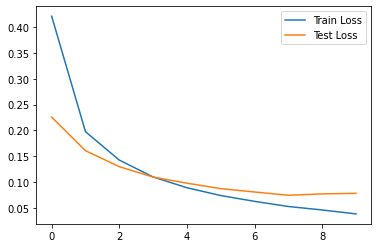

In [69]:
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.legend();

In [71]:
# Calculate the train accuracy
n_correct = 0.
n_total = 0.

for inputs, targets in train_loader:
  # Move data to GPU
  inputs, targets = inputs.to(device), targets.to(device) 

  # Reshape the input
  inputs = inputs.view(-1, 784)

  # Forward Pass
  outputs = model(inputs)
  loss = criterion(outputs, targets)

  # Get prediction
  # torch.max return both max and argmax
  _, predictions = torch.max(outputs, 1)

  # Update counts
  n_correct += (predictions == targets).sum().item()
  n_total += targets.shape[0]

train_acc = n_correct / n_total

In [72]:
# Calculate the test accuracy
n_correct = 0.
n_total = 0.

for inputs, targets in test_loader:
  # Move data to GPU
  inputs, targets = inputs.to(device), targets.to(device) 

  # Reshape the input
  inputs = inputs.view(-1, 784)

  # Forward Pass
  outputs = model(inputs)
  loss = criterion(outputs, targets)

  # Get prediction
  # torch.max return both max and argmax
  _, predictions = torch.max(outputs, 1)

  # Update counts
  n_correct += (predictions == targets).sum().item()
  n_total += targets.shape[0]

test_acc = n_correct / n_total

In [73]:
print(f"Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")

Train Accuracy: 0.9902, Test Accuracy: 0.9760


In [74]:
!pip install torchmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 517.2/517.2 KB 37.1 MB/s eta 0:00:00


In [84]:
# Get all the predictions in an array and plot confusion matrix

x_test = test_dataset.data.numpy()
y_test = test_dataset.targets
p_test = np.array([])

for inputs, targets in test_loader:
  # Move data to GPU
  inputs, targets = inputs.to(device), targets.to(device)

  # Reshape the input
  inputs = inputs.view(-1, 784)

  # Forward Pass
  outputs = model(inputs)
  loss = criterion(outputs, targets)

  # Get prediction
  # torch.max return both max and argmax
  _, predictions = torch.max(outputs, 1)

  # Concatenate the predictions
  p_test = np.concatenate((p_test, predictions.cpu().numpy())) 

In [89]:
# Confusion Matrix
from torchmetrics import ConfusionMatrix
confmat = ConfusionMatrix(task="multiclass", num_classes=10)
confmat(torch.Tensor(p_test), y_test)

tensor([[ 967,    0,    2,    1,    0,    0,    7,    0,    2,    1],
        [   0, 1125,    4,    0,    0,    1,    2,    0,    3,    0],
        [   4,    2, 1013,    1,    1,    0,    2,    4,    5,    0],
        [   0,    0,    9,  984,    1,    6,    1,    5,    2,    2],
        [   0,    0,    4,    1,  966,    0,    8,    1,    0,    2],
        [   3,    1,    0,    8,    2,  866,    7,    1,    2,    2],
        [   2,    3,    2,    1,    2,    2,  946,    0,    0,    0],
        [   1,    4,   13,    0,    2,    0,    0, 1001,    1,    6],
        [   6,    0,    7,   10,    7,    8,    8,    4,  921,    3],
        [   2,    4,    0,    5,   17,    2,    2,    4,    2,  971]])

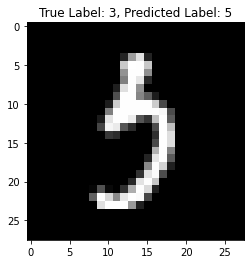

In [99]:
y_numpy_test = y_test.numpy()
misclassified_idx = np.where(p_test != y_numpy_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title(f"True Label: {y_numpy_test[i]}, Predicted Label: {int(p_test[i])}");